## Objective:
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Data Description:
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

## Data Dictionary

S.No.: Serial number
Name: Name of the car which includes brand name and model name
Location: Location in which the car is being sold or is available for purchase (cities)
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
Price: The price of the used car in INR Lakhs

In [153]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [154]:
# loading the dataset
data = pd.read_csv("used_cars_data.csv")

### Basic summary statistics and consequences

In [155]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


In [156]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [157]:
# checking the names of the columns in the data
print(data.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [158]:
# to check summary of dataset
data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### KEY INSIGHT / OBSERVATION
we can tell that there are 5 columns with missing data

Mumbai is the location with the most cars 

Mileage, engine and power are considered objects cause they contain both string and int values 

we can see the unique values of the variables

Mumbai is top location, diesel is the top fuel type

most cars were produced during the year 2011-2016

Transmission, location, owner, fuel type are catergorical

max price is 160 and min price is 1.44

In [159]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [160]:
data.corr()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
S.No.,1.000000,0.005573,-0.007697,-0.006720,-0.020737,-0.020275
Year,0.005573,1.000000,-0.187859,0.008216,-0.006277,0.305327
Kilometers_Driven,-0.007697,-0.187859,1.000000,0.090221,0.015501,-0.011493
Seats,-0.006720,0.008216,0.090221,1.000000,0.037519,0.052225
New_Price,-0.020737,-0.006277,0.015501,0.037519,1.000000,0.763362
Price,-0.020275,0.305327,-0.011493,0.052225,0.763362,1.000000


In [161]:
data.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

### Data pre-processing
- Prepare the data for analysis and modeling 

- Missing value Treatment 

- Outlier Treatment - Feature Engineering

In [162]:
# checking for missing values in the data
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

#### starting with mileage column for analysis

In [163]:
data.loc[data['Mileage'].isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


#### observation
only 2 rows are empty with both being the first owner, automatic transmission and electric fuel type

In [164]:
#to see the amount of null values Mileage contains 
print(data.Mileage.isnull().sum())

2


In [165]:
data["Mileage"] = data["Mileage"].str.replace("kmpl","")
data["Mileage"] = data["Mileage"].str.replace("km/kg","")
data["Mileage"] = data["Mileage"].astype(float)
np.random.seed(1)
data.sample(n=20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.00,1497 CC,121.36 bhp,5.0,9.470,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.50,1197 CC,81.80 bhp,5.0,5.440,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.10,2499 CC,141 bhp,7.0,35.290,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.00,2143 CC,201.1 bhp,5.0,86.970,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.90,1197 CC,82 bhp,5.0,8.230,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,7.0,28.050,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.00,2143 CC,201.1 bhp,5.0,86.970,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68,1968 CC,174.33 bhp,5.0,67.100,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.50,1197 CC,80 bhp,5.0,10.250,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.50,1199 CC,88.7 bhp,5.0,9.360,8.20


In [166]:
#to decide if i'll drop the records or replace with median further analysis will be conducted
data['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

### Dropping missing values
Reason
- there are only 2 cars with milleage missing and they are both electric 
- here is no values for electric cars, hence i'll drop them
- inputing a value will affect price of electric cars

In [167]:
#dropping rows of null values
data.dropna(subset=["Mileage"], inplace=True)

In [168]:
#electric cars have been completely dropped 
data['Fuel_Type'].value_counts()

Diesel    3852
Petrol    3325
CNG         62
LPG         12
Name: Fuel_Type, dtype: int64

#### Dropping Serial number
Reason
- its not useful to the dataset
- its an independent variable

In [169]:
data.drop(['S.No.'],axis=1,inplace=True)

In [170]:
# serisl number has been completely removed from the data
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

### Power column

In [171]:
data.loc[data['Power'].isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399 CC,NaN,5.0,11.685,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086 CC,NaN,5.0,4.550,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086 CC,NaN,5.0,4.550,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086 CC,NaN,5.0,4.550,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086 CC,NaN,5.0,4.550,1.67
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,13.580,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,2.11
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248 CC,NaN,5.0,7.880,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086 CC,NaN,5.0,4.550,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.00,1086 CC,NaN,5.0,4.550,1.75


In [172]:
#to see the amount of null values power contains 
print(data.Power.isnull().sum())

175


In [173]:
data["Power"] = data["Power"].str.replace("bhp","")
data["Power"] = data["Power"].astype(float)
np.random.seed(1)
data.sample(n=20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5044,Toyota Fortuner 3.0 Diesel,Chennai,2010,136000,Diesel,Manual,Second,11.50,2982 CC,171.00,7.0,37.170,11.00
7026,Hyundai Xcent 1.1 CRDi S,Kolkata,2014,60188,Diesel,Manual,First,24.40,1120 CC,71.00,5.0,8.230,NaN
2781,Maruti Alto LXi,Kolkata,2010,38127,Petrol,Manual,First,19.70,796 CC,46.30,5.0,4.360,1.55
3658,Hyundai Xcent 1.1 CRDi Base,Hyderabad,2016,106092,Diesel,Manual,First,24.40,1120 CC,71.00,5.0,8.230,4.40
2868,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248 CC,74.00,5.0,7.880,5.75
3780,Mahindra Xylo E4 ABS BS III,Pune,2013,167362,Diesel,Manual,First,11.68,2498 CC,112.00,7.0,11.670,4.00
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.00,2143 CC,201.10,5.0,86.970,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68,1968 CC,174.33,5.0,67.100,20.77
3203,Honda City i-VTEC CVT VX,Mumbai,2015,19000,Petrol,Automatic,First,18.00,1497 CC,117.30,5.0,15.290,8.95
3451,Hyundai Grand i10 1.2 Kappa Asta,Bangalore,2014,61325,Petrol,Manual,First,18.90,1197 CC,81.86,5.0,8.100,4.40


#### Dropping Power
Reason
- the information is not enough to determine what to replace with

In [174]:
#dropping rows of null values
data.dropna(subset=["Power"], inplace=True)

In [175]:
#to see the amount of null values power contains 
print(data.Power.isnull().sum())

0


In [176]:
# the null values in power has been dropped
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   3
New_Price               0
Price                1202
dtype: int64

### Seat column

In [177]:
data.loc[data['Seats'].isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498 CC,99.0,NaN,7.65,3.6
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493 CC,100.0,NaN,13.58,1.7
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199 CC,88.7,NaN,9.60,NaN


In [178]:
#to see the amount of null values seats contains 
print(data.Seats.isnull().sum())

3


In [179]:
data['Seats'].median()

5.0

In [180]:
#replace the missing values in engine with median value. 
data['Seats'] = data['Seats'].fillna(data['Seats'].median())
data['Seats'] = data['Seats'].astype(float)

In [181]:
#to see the amount of null values power contains 
print(data.Seats.isnull().sum())

0


In [182]:
#seats has no missing values again
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1202
dtype: int64

In [183]:
data.loc[data['Engine'].isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


### observation
- whenever engine was absent power was absent hence;
- dropping power also dropped engine

In [184]:
data["Engine"] = data["Engine"].str.replace("CC","")
data["Engine"] = data["Engine"].astype(float)
np.random.seed(1)
data.sample(n=20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
336,Toyota Corolla H4,Chennai,2004,105000,Petrol,Automatic,Second,11.30,1794.0,125.00,5.0,21.085,2.50
3922,Hyundai Santro Xing GL Plus,Pune,2012,79000,Petrol,Manual,Second,17.92,1086.0,62.10,5.0,4.550,1.60
1593,Hyundai EON Magna Plus,Hyderabad,2013,20000,Petrol,Manual,Second,21.10,814.0,55.20,5.0,10.250,2.30
5256,Maruti Vitara Brezza ZDi Plus Dual Tone,Pune,2016,85000,Diesel,Manual,First,24.30,1248.0,88.50,5.0,11.960,8.90
3288,Maruti Swift Dzire 1.2 Vxi BSIV,Delhi,2010,72425,Petrol,Manual,Second,17.50,1197.0,85.80,5.0,7.880,2.45
3097,Maruti Wagon R LXI CNG,Pune,2012,92000,CNG,Manual,Second,26.20,998.0,58.20,5.0,5.510,3.00
3248,Volkswagen Polo Petrol Trendline 1.2L,Kochi,2011,58752,Petrol,Manual,First,16.47,1198.0,73.90,5.0,10.150,3.32
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.20,1086.0,68.05,5.0,10.250,2.85
320,Maruti Ertiga Paseo VXI,Mumbai,2018,18000,Petrol,Manual,First,16.02,1373.0,93.70,7.0,11.270,8.25
4853,Maruti Swift VXI BSIV,Ahmedabad,2015,36100,Petrol,Manual,First,20.40,1197.0,81.80,5.0,7.880,4.50


In [185]:
#to see the amount of null values engine contains 
print(data.Engine.isnull().sum())

0


In [186]:
#to see the amount of null values price contains 
print(data.Price.isnull().sum())

1202


In [187]:
#to see the amount of null values power contains 
print(data.New_Price.isnull().sum())

0


### Price and New price observation
- there is no missing value for new price 
- alot of missing values for price
- this could be due to loss of information from the first owner
- or when the data was being imputed 

### Dropping Price

In [188]:
#dropping rows of price containing null values
data.dropna(subset=["Price"], inplace=True)

In [189]:
#no missing values again
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [190]:
# to check summary of dataset
data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5874,1812,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5874,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5874.0,NaN,NaN,NaN,2013.476507,3.166025,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5874.0,NaN,NaN,NaN,58324.115594,92154.6643,171.0,33431.25,52621.5,72408.25,6500000.0
Fuel_Type,5874,4,Diesel,3153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5874,2,Manual,4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5874,4,First,4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5874.0,NaN,NaN,NaN,18.273829,4.371965,0.0,15.26,18.2,21.1,33.54
Engine,5874.0,NaN,NaN,NaN,1625.701226,601.544134,624.0,1198.0,1495.5,1991.0,5998.0
Power,5874.0,NaN,NaN,NaN,113.272203,53.873317,34.2,75.0,97.7,138.1,560.0


In [191]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [192]:
#fixing datatypes required to be category
data["Name"]=data["Name"].astype("category")
data["Location"]=data["Location"].astype("category")
data["Fuel_Type"]=data["Fuel_Type"].astype("category")
data["Transmission"]=data["Transmission"].astype("category")
data["Owner_Type"]=data["Owner_Type"].astype("category")

In [193]:
data.dtypes

Name                 category
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price             float64
Price                 float64
dtype: object

In [195]:
#no of unique names in the dataset
data["Name"].nunique()

1812

In [194]:
data["Name"].unique()

['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option', 'Honda Jazz V', 'Maruti Ertiga VDI', 'Audi A4 New 2.0 TDI Multitronic', ..., 'Hyundai Elantra SX', 'Maruti Wagon R Duo Lxi', 'Volkswagen Polo IPL II 1.2 Petrol Highline', 'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV']
Length: 1812
Categories (1812, object): ['Ambassador Classic Nova Diesel', 'Audi A3 35 TDI Attraction', 'Audi A3 35 TDI Premium', 'Audi A3 35 TDI Premium Plus', ..., 'Volvo XC60 D5', 'Volvo XC60 D5 Inscription', 'Volvo XC90 2007-2015 D5 AT AWD', 'Volvo XC90 2007-2015 D5 AWD']

### Exploratory data analysis
- Univariate and bivariate analysis
- Key meaningful observations on the relationship between variables

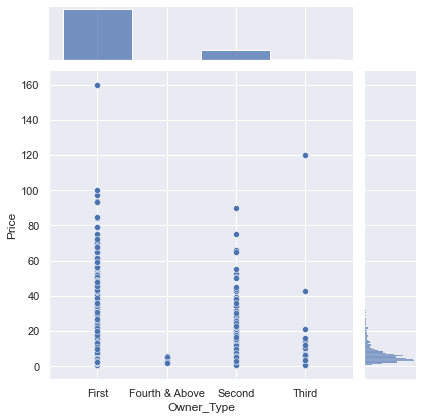

In [197]:
#comparing the prices to the owner types
sns.jointplot(x="Owner_Type", y="Price", data=data);

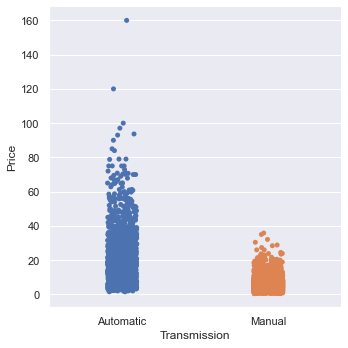

In [198]:
#comparing prices to transmission of cars
sns.catplot(x="Transmission", y="Price", data=data);

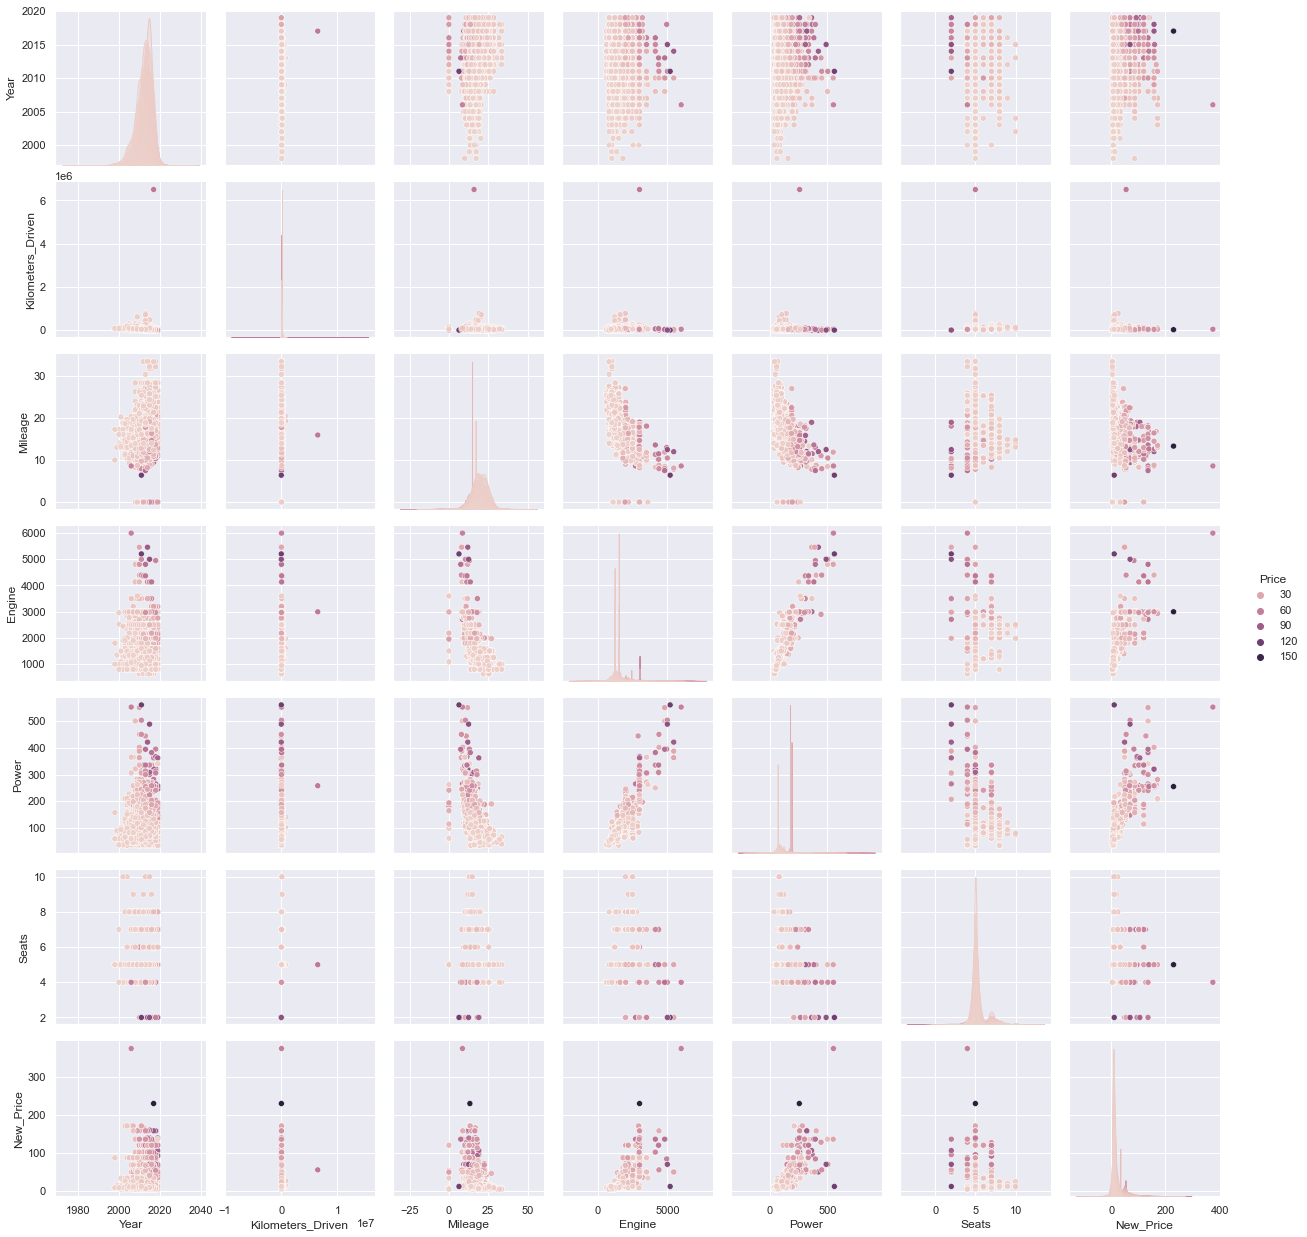

In [199]:
#plot pairwise relationships between price and all variables
sns.pairplot(data, hue="Price");

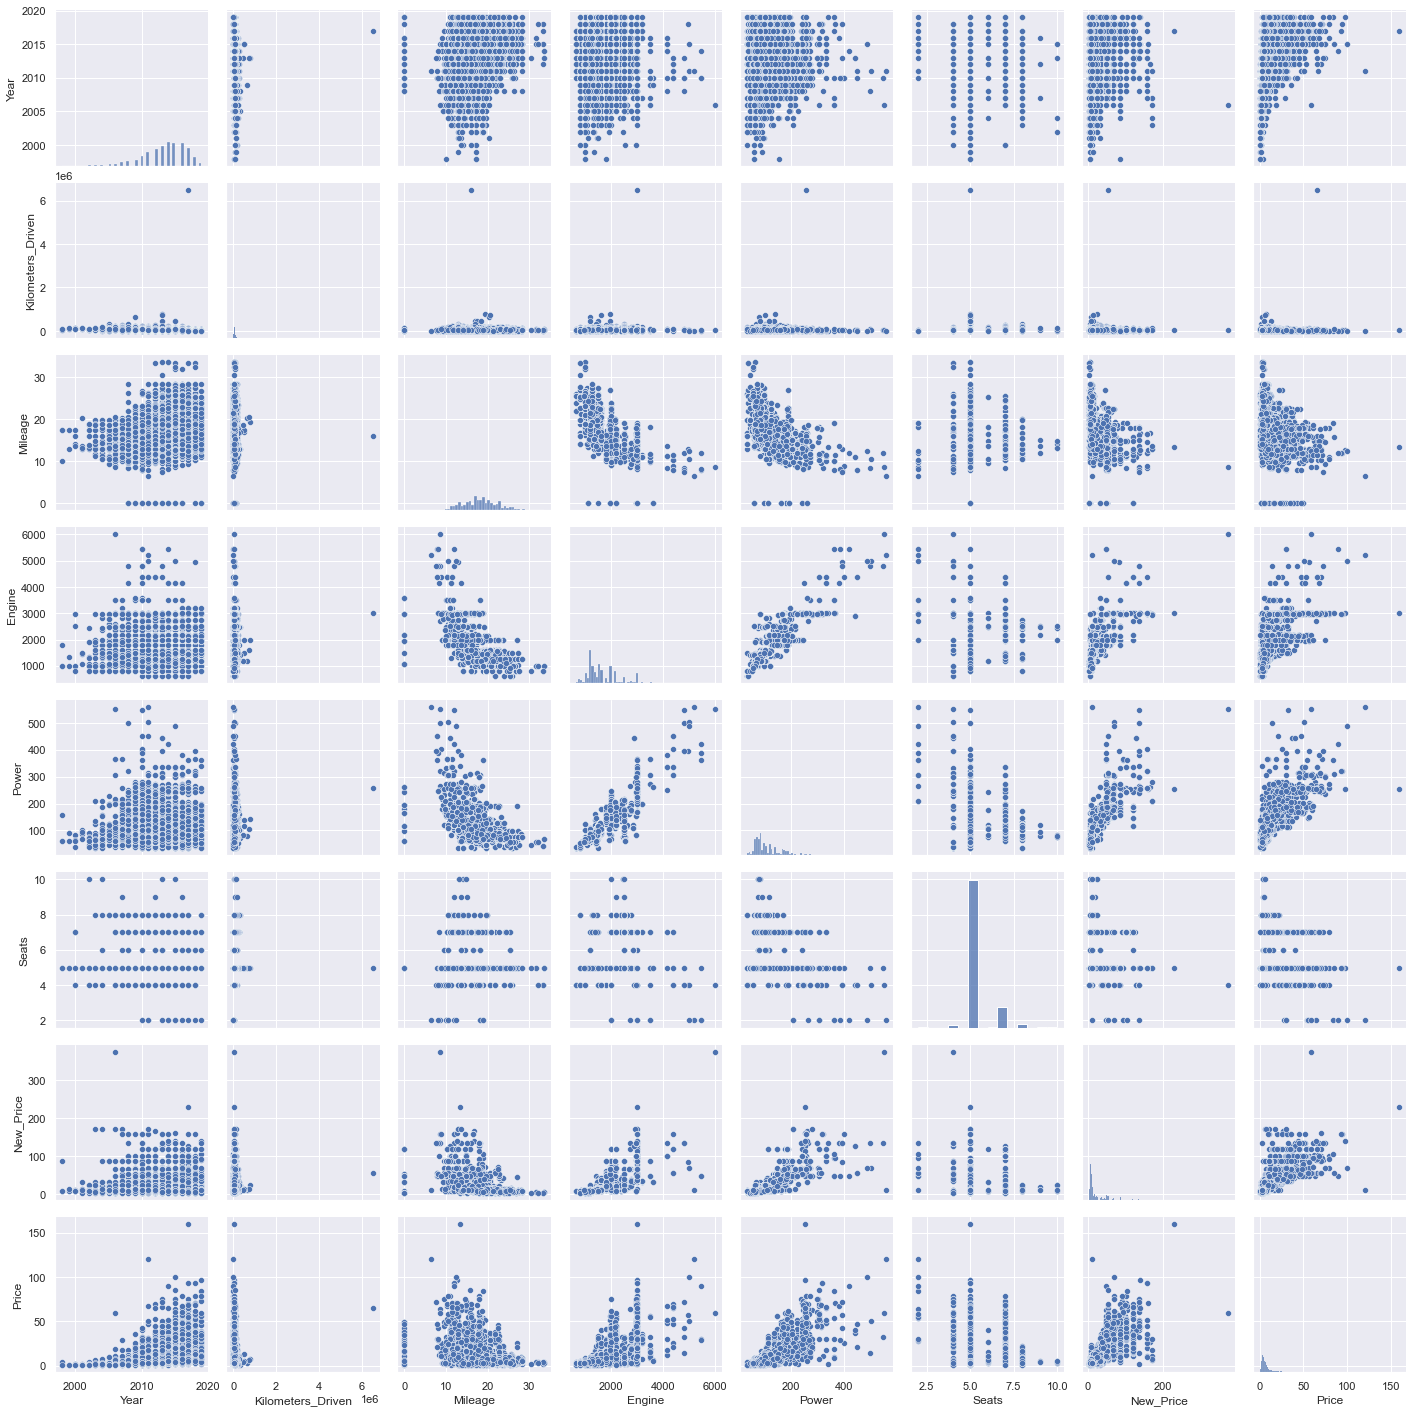

In [201]:
#pairplot to plot pairwise relationships between variables
sns.pairplot(data=data);

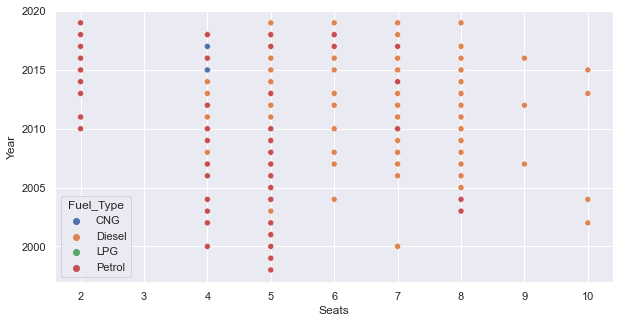

In [202]:
#scatterplot showing the relationship between the year, seats, and fuel type used by customers
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Seats', y='Year', hue='Fuel_Type');

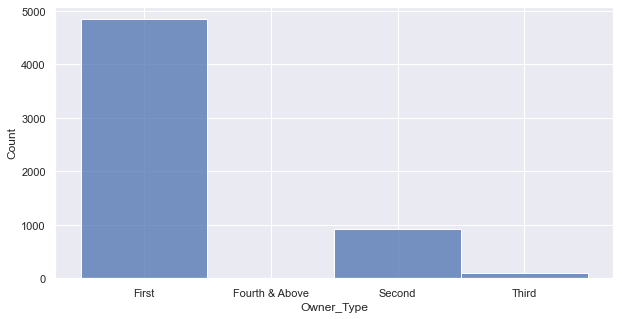

In [203]:
#histplot showing the amount of people who have owned the vehicles
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Owner_Type');

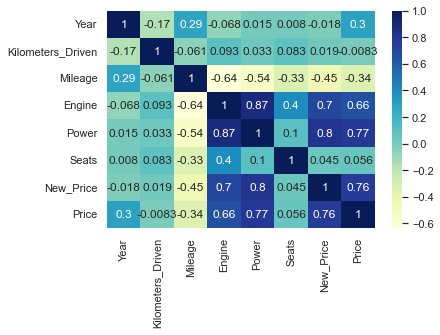

In [204]:
#to calculate the relationship between every variable 
#each column represented using colour encoded matrix
sns.heatmap(data.corr(), annot = True, cmap='YlGnBu');

<AxesSubplot:xlabel='Transmission', ylabel='count'>

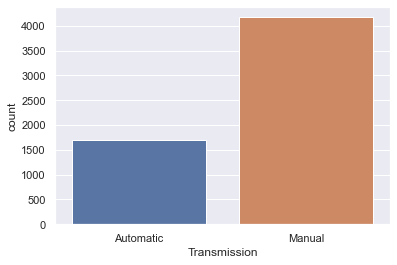

In [205]:
#Showing the counts of observations in each Transmission
sns.countplot(data=data, x='Transmission')

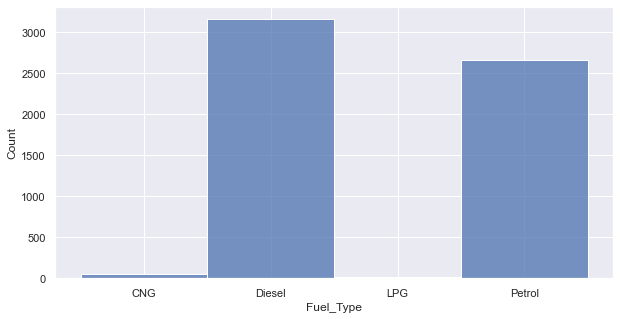

In [206]:
#histplot showing diesel is most used among the cars and summarizing fuel types
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Fuel_Type');

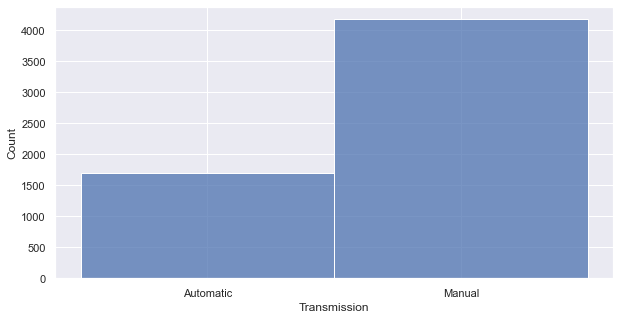

In [207]:
#histplot summarizing transmission
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Transmission');

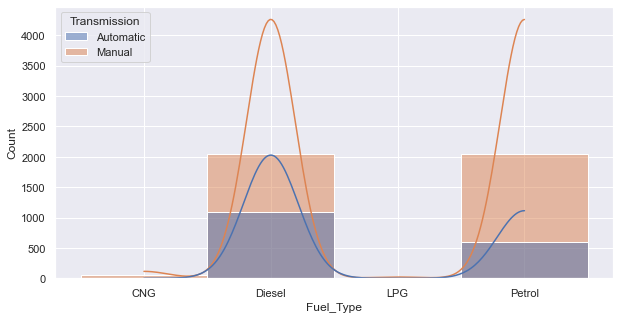

In [208]:
#histplot summarizing relationship between fuel type and transmission
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Fuel_Type', hue='Transmission', kde=True);

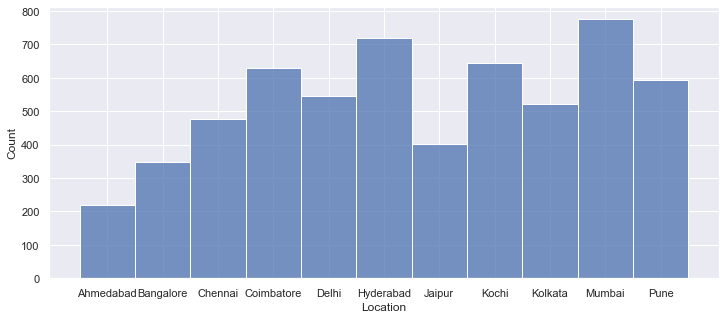

In [209]:
#histplot summarizing locations of vehicles
plt.figure(figsize=(12,5))
sns.histplot(data=data, x='Location',);

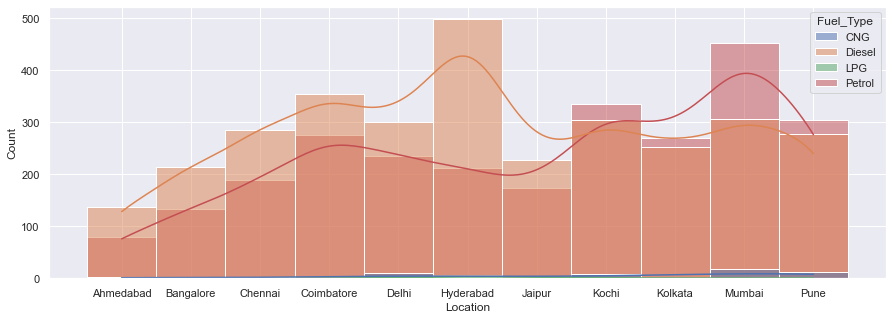

In [211]:
#histplot showing rel btw location and fuel type
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Location', hue='Fuel_Type', kde=True);

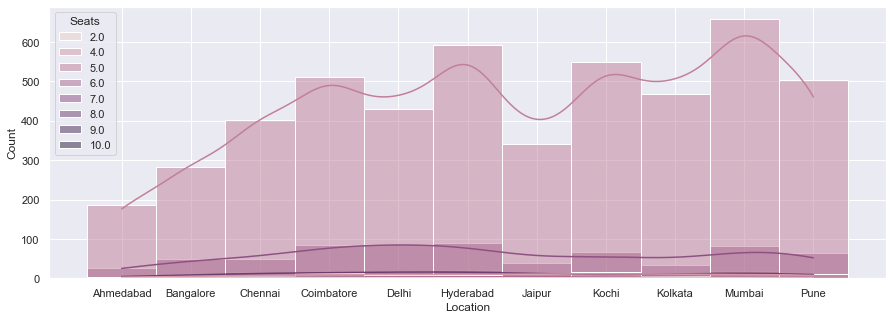

In [214]:
#histplot showing rel btw location and seats
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Location', hue='Seats', kde=True);

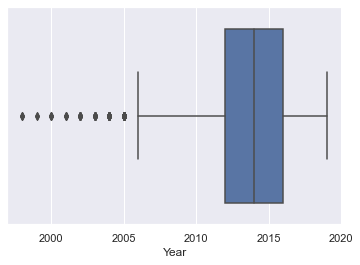

In [215]:
#Plotting a box plot to study central tendency
sns.boxplot(data=data, x='Year');

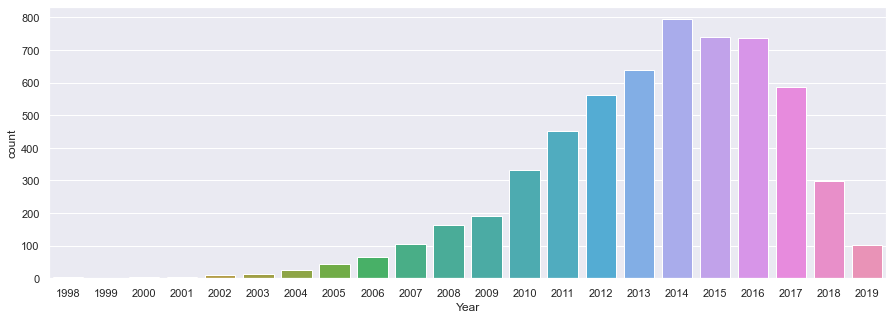

In [216]:
#highest no of cars are year 2014
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='Year');

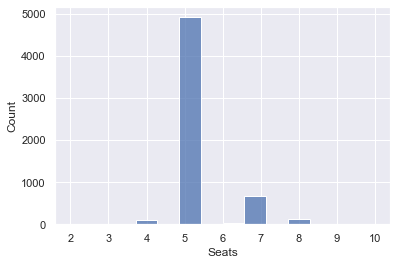

In [217]:
#cars with 5 seats are the most
sns.histplot(data=data, x='Seats');

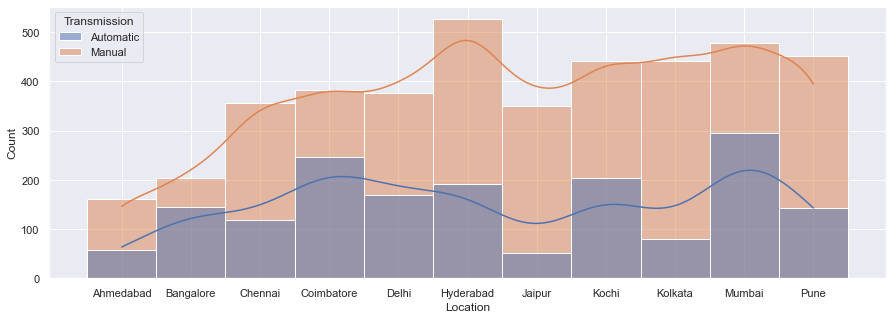

In [220]:
#histplot showing rel btw location and transmission
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Location', hue='Transmission', kde=True);

### Univariate analysis

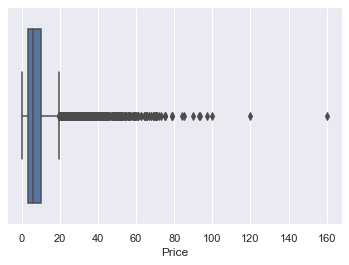

In [222]:
#boxplot indicating price is rightly skewed and has alot of outliers
sns.boxplot(data=data, x='Price');

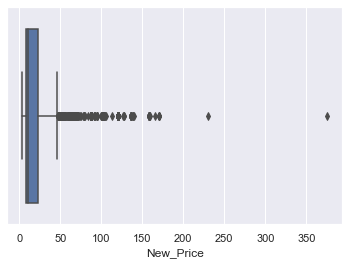

In [223]:
#boxplot indicating new price is rightly skewed and has alot of outliers
sns.boxplot(data=data, x='New_Price');

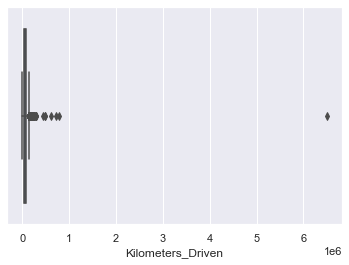

In [224]:
#boxplot indicating kilometers driven has alot of outliers
sns.boxplot(data=data, x='Kilometers_Driven');

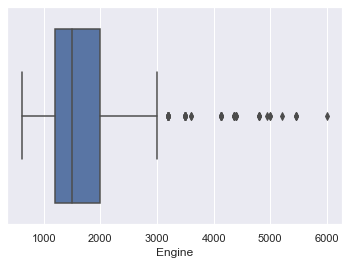

In [225]:
#boxplot indicating engine has outliers, rightly skewed
sns.boxplot(data=data, x='Engine');

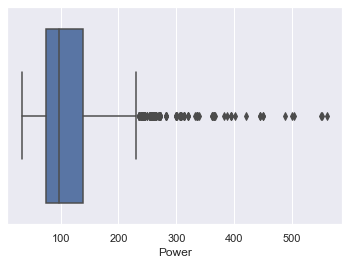

In [226]:
#boxplot indicating power has outliers, rightly skewed
sns.boxplot(data=data, x='Power');

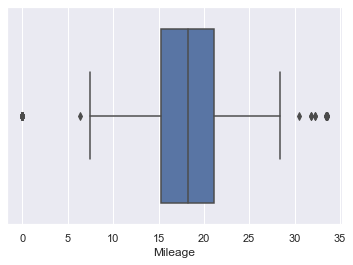

In [227]:
#boxplot indicating mileage has outliers
sns.boxplot(data=data, x='Mileage');

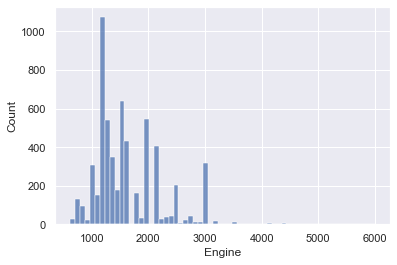

In [228]:
#histplot showing no of engine
sns.histplot(data=data, x='Engine');

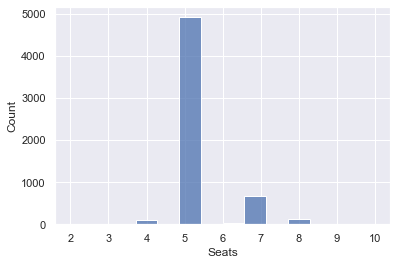

In [229]:
#histplot showing amount of seat
sns.histplot(data=data, x='Seats');

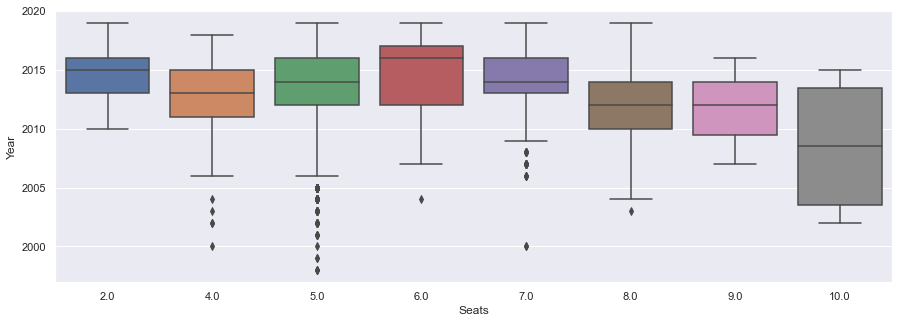

In [230]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='Seats', y='Year');

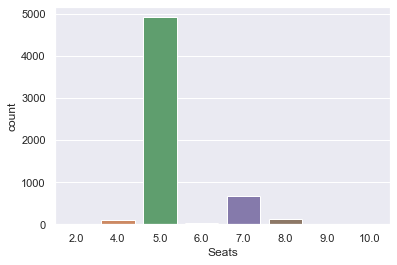

In [231]:
sns.countplot(data=data, x='Seats');

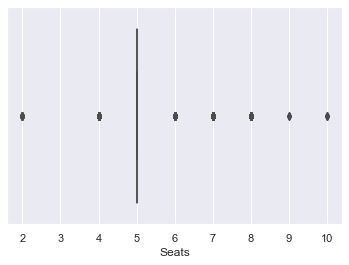

In [232]:
sns.boxplot(data=data, x='Seats');

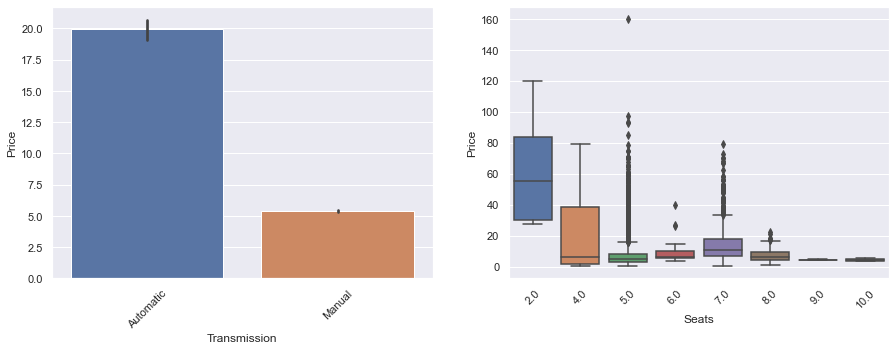

In [233]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Price", x="Transmission")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Price", x="Seats")
plt.xticks(rotation=45)

plt.show()

### Price

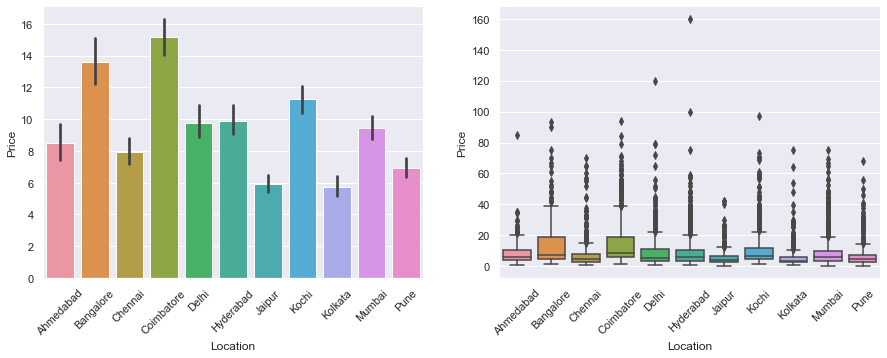

In [234]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Price", x="Location")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Price", x="Location")
plt.xticks(rotation=45)

plt.show()

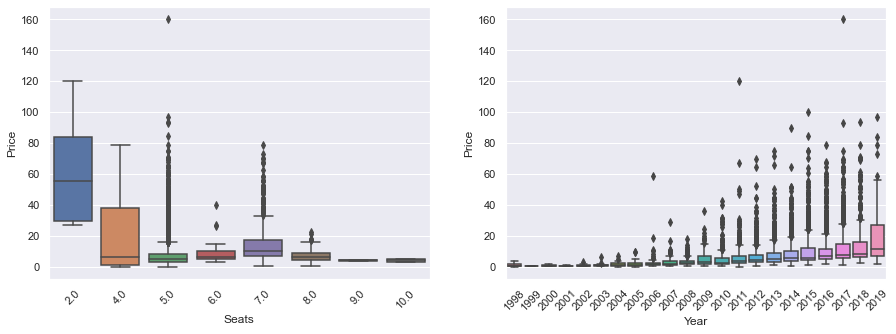

In [235]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, y="Price", x="Seats")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Price", x="Year")
plt.xticks(rotation=45)

plt.show()

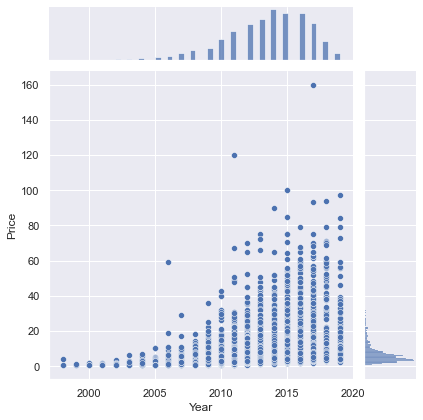

In [236]:
#the newer the car, the higher the price
sns.jointplot(x="Year", y="Price", data=data);

### New Price

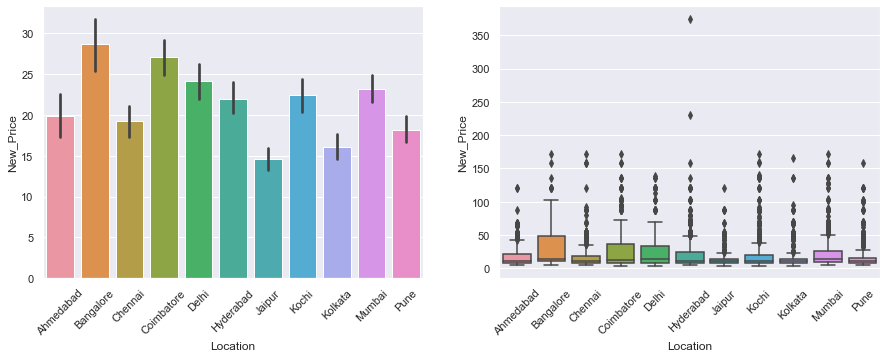

In [238]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="New_Price", x="Location")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="New_Price", x="Location")
plt.xticks(rotation=45)

plt.show()

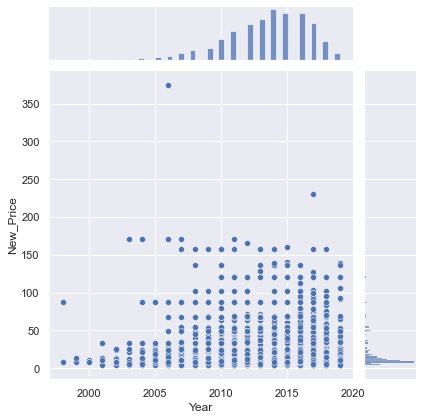

In [239]:
sns.jointplot(x="Year", y="New_Price", data=data)
plt.xticks(rotation=90)
plt.show()

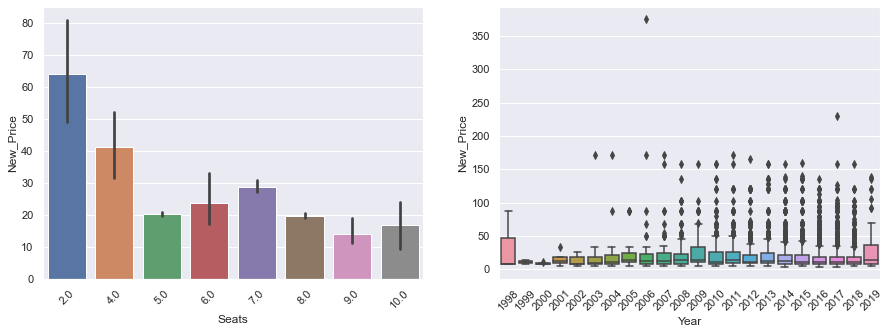

In [240]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="New_Price", x="Seats")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="New_Price", x="Year")
plt.xticks(rotation=45)

plt.show()

In [241]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.169396,0.285191,-0.067918,0.014612,0.007960,-0.017938,0.299543
Kilometers_Driven,-0.169396,1.000000,-0.060669,0.093012,0.033470,0.083043,0.018648,-0.008298
Mileage,0.285191,-0.060669,1.000000,-0.636028,-0.537729,-0.330711,-0.449112,-0.340554
Engine,-0.067918,0.093012,-0.636028,1.000000,0.866303,0.401130,0.700790,0.658044
Power,0.014612,0.033470,-0.537729,0.866303,1.000000,0.101487,0.802879,0.772837
Seats,0.007960,0.083043,-0.330711,0.401130,0.101487,1.000000,0.044598,0.055616
New_Price,-0.017938,0.018648,-0.449112,0.700790,0.802879,0.044598,1.000000,0.763274
Price,0.299543,-0.008298,-0.340554,0.658044,0.772837,0.055616,0.763274,1.000000


### Handling Outlier / treatment
- Engine
- Power
- Kilometers Driven

### Engine

In [242]:
quartiles = np.quantile(data['Engine'][data['Engine'].notnull()], [.25, .75])
engine_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {engine_4iqr}')
outlier_engine = data.loc[np.abs(data['Engine'] - data['Engine'].median()) > engine_4iqr, 'Engine']
outlier_engine

Q1 = 1198.0, Q3 = 1991.0, 4*IQR = 3172.0


70      4806.0
152     5461.0
2100    4806.0
2978    4806.0
4451    4951.0
4691    5461.0
4722    5461.0
5088    5000.0
5521    5998.0
5603    4806.0
5781    5204.0
5919    5000.0
Name: Engine, dtype: float64

In [245]:
#there are 12 values outside the range(outliers)
#i'm not dropping them because the outliers represent natural variations
#we can conduct a random search 
data.loc[5521]

Name                 Bentley Continental Flying Spur
Location                                   Hyderabad
Year                                            2006
Kilometers_Driven                              48000
Fuel_Type                                     Petrol
Transmission                               Automatic
Owner_Type                                     First
Mileage                                          8.6
Engine                                        5998.0
Power                                          552.0
Seats                                            4.0
New_Price                                      375.0
Price                                           59.0
Name: 5521, dtype: object

In [251]:
data.loc[5603]

Name                 Porsche Panamera 2010 2013 Diesel
Location                                         Delhi
Year                                              2013
Kilometers_Driven                                36400
Fuel_Type                                       Diesel
Transmission                                 Automatic
Owner_Type                                       First
Mileage                                            7.5
Engine                                          4806.0
Power                                            394.3
Seats                                              4.0
New_Price                                        136.0
Price                                             72.0
Name: 5603, dtype: object

### Power

In [252]:
quartiles = np.quantile(data['Power'][data['Power'].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_power = data.loc[np.abs(data["Power"] - data['Power'].median()) > power_4iqr, 'Power']
outlier_power

Q1 = 75.0, Q3 = 138.1, 4*IQR = 252.39999999999998


70      500.00
134     362.07
148     444.00
152     362.90
418     367.00
589     364.90
1930    364.90
2095    362.07
2100    550.00
2978    394.30
3341    402.00
4061    444.00
4342    364.90
4451    395.00
4627    450.00
4691    421.00
4722    387.30
4821    450.00
5088    503.00
5341    382.00
5521    552.00
5603    394.30
5781    560.00
5919    488.10
Name: Power, dtype: float64

In [253]:
#there are 24 values outside the range(outliers)
#treating outliers, we drop the values, but we can conduct a random search
data.loc[5781]

Name                 Lamborghini Gallardo Coupe
Location                                  Delhi
Year                                       2011
Kilometers_Driven                          6500
Fuel_Type                                Petrol
Transmission                          Automatic
Owner_Type                                Third
Mileage                                     6.4
Engine                                   5204.0
Power                                     560.0
Seats                                       2.0
New_Price                                  11.3
Price                                     120.0
Name: 5781, dtype: object

In [255]:
#i'm not dropping them because the outliers represent natural variations
data.loc[5521]

Name                 Bentley Continental Flying Spur
Location                                   Hyderabad
Year                                            2006
Kilometers_Driven                              48000
Fuel_Type                                     Petrol
Transmission                               Automatic
Owner_Type                                     First
Mileage                                          8.6
Engine                                        5998.0
Power                                          552.0
Seats                                            4.0
New_Price                                      375.0
Price                                           59.0
Name: 5521, dtype: object

### Kilometers Driven

In [256]:
quartiles = np.quantile(data['Kilometers_Driven'][data['Kilometers_Driven'].notnull()], [.25, .75])
kd_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {kd_4iqr}')
outlier_kd = data.loc[np.abs(data['Kilometers_Driven'] - data['Kilometers_Driven'].median()) > kd_4iqr, 'Kilometers_Driven']
outlier_kd

Q1 = 33431.25, Q3 = 72408.25, 4*IQR = 155908.0


29       262000
77       230000
181      216000
340      775000
358      620000
838      215000
1101     248000
1442     231673
1528     299322
1766     220000
1846     255000
1860     720000
1975     282000
2328    6500000
2346     234000
2823     480000
2988     240000
3092     480000
3649     300000
3713     232000
3894     250000
4491     445000
4719     250000
4792     242000
5800     210000
5834     250000
Name: Kilometers_Driven, dtype: int64

In [259]:
#definately an error
# drop the records
data.drop(outlier_kd.index, axis=0, inplace=True)

<AxesSubplot:xlabel='Kilometers_Driven'>

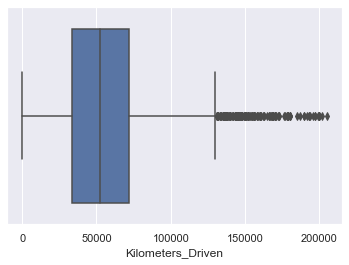

In [261]:
sns.boxplot(data=data, x='Kilometers_Driven')

In [264]:
cols_to_log=['New_Price','Price']

for i in cols_to_log:
    print(i+' variable')#to show new price and price 
    print('Value before log transform ',frac_outside_1pt5_IQR(data[i])*100)
    print('Value after log transform ',frac_outside_1pt5_IQR(np.log(data[i]))*100,'\n')

New_Price variable
Value before log transform  20.861833105335155
Value after log transform  9.080027359781122 

Price variable
Value before log transform  16.31326949384405
Value after log transform  8.8406292749658 



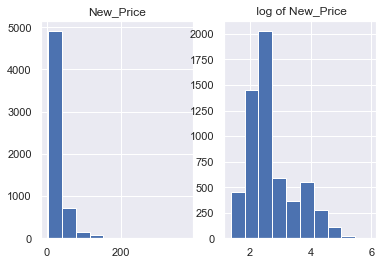

In [266]:
plt.subplot(1, 2, 1)
plt.title('New_Price')
plt.hist(data['New_Price'],10)
plt.subplot(1, 2, 2)
plt.title(' log of New_Price')
plt.hist(np.log(data['New_Price']),10)
plt.show()

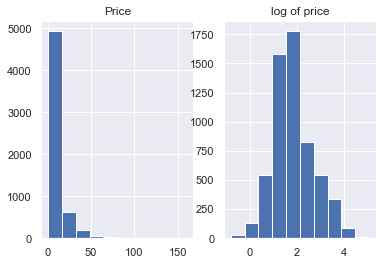

In [267]:
plt.subplot(1, 2, 1)
plt.title('Price')
plt.hist(data['Price'],10)
plt.subplot(1, 2, 2)
plt.title('log of price')
plt.hist(np.log(data['Price']),10)
plt.show()

In [284]:
#x representing independent var, and y rep dependent var
x = data[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
           'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power',
           'Seats', 'New_Price']]
y = data[['Price']]

In [285]:
#dummy variables
x = pd.get_dummies(x, columns=['Location', 'Fuel_Type','Transmission','Owner_Type'], drop_first=True)

In [286]:
x.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,5.51,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,16.06,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,8.61,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,11.27,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,53.14,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [289]:
# intialize the model to be fit and fit the model on the train data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [290]:
# get the score (R-squared) on the training set

print(
    "The score (R-squared) on the training set is ",
    regression_model.score(x_train, y_train),
)

The score (R-squared) on the training set is  0.7630501911426383


In [292]:
def r_squared(model, x, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(x)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(regression_model, x_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  Price    123833.401732
dtype: float64
SST:  Price    522614.482488
dtype: float64
R-squared:  Price    0.76305
dtype: float64


In [293]:
# get the score (R-squared) on the test set

print(
    "The score (R-squared) on the test set is ", regression_model.score(x_test, y_test)
)

The score (R-squared) on the test set is  0.7654878300010762


In [294]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(x_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  5.500447569278766


In [296]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, regression_model.predict(x_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  5.380800579963557


In [298]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.877589
Kilometers_Driven,-0.000040
Mileage,-0.087971
Engine,0.000991
Power,0.079712
Seats,-0.395094
New_Price,0.166508
Location_Bangalore,1.982291
Location_Chennai,1.157066
Location_Coimbatore,1.778005


In [300]:
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [302]:
print(
    "The Root Mean Square Error (MAE) of the model for the test set is ",
    np.sqrt(mean_absolute_error(y_test, regression_model.predict(x_test))),
)

The Root Mean Square Error (MAE) of the model for the test set is  1.7748850418857658
